In [7]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

import numpy as np
import soundfile as sf
import librosa
import IPython.display as ipd
from sklearn.preprocessing import minmax_scale
from glob import glob
import re
import matplotlib.pyplot as plt
%matplotlib inline
from shutil import copy
import audio_functions as af
import dataset


In [2]:
def mix_audio(voice_file, background_file):
    
    # Load the files
    voice, voice_sr = sf.read(voice_file)
    background, background_sr = sf.read(background_file)

    if voice_sr != background_sr:
        librosa.resample(background, voice_sr)

    # Select a segment of the background track to use
    start_point = np.random.randint(len(background) - len(voice))
    background_segment = background[start_point:start_point+len(voice)]

    # Normalise both sources and mix
    norm_voice = minmax_scale(voice, (-1,1))
    norm_bgs = minmax_scale(background_segment,(-1,1))
    norm_mix = (0.6*norm_voice) + (0.4*norm_bgs)
    
    return norm_mix, voice_sr, background_segment, voice

In [7]:
os.listdir(inputpath)

['et05_caf_real',
 'dt05_bth',
 'dt05_ped_real',
 'tr05_ped_simu',
 'et05_ped_simu',
 'et05_str_simu',
 'tr05_org',
 'tr05_ped_real',
 'tr05_str_real',
 'tr05_str_simu',
 'dt05_caf_simu',
 'tr05_caf_real',
 'dt05_bus_simu',
 'tr05_bus_simu',
 'et05_str_real',
 'et05_bus_real',
 'dt05_ped_simu',
 'dt05_bus_real',
 'et05_bth',
 'et05_caf_simu',
 'et05_bus_simu',
 'tr05_caf_simu',
 'dt05_caf_real',
 'tr05_bth',
 'dt05_str_real',
 'et05_ped_real',
 'dt05_str_simu',
 'tr05_bus_real']

In [8]:
structure

'/home/enterprise.internal.city.ac.uk/acvn728/NewCHiME/tr05_bus_real'

In [6]:
# Copy the file structure

inputpath = '/data/Speech_Data/CHiME3/data/audio/16kHz/isolated/'
outputpath = '/home/enterprise.internal.city.ac.uk/acvn728/NewCHiME/'


for dirpath, dirnames, filenames in os.walk(inputpath):
    structure = os.path.join(outputpath, dirpath[len(inputpath):])
    if not os.path.isdir(structure):
        os.mkdir(structure)
    else:
        print("Folder already exits!")
for folder in os.listdir(outputpath):
    if '_real' in folder:
        os.rename(os.path.join(outputpath, folder),
                  os.path.join(outputpath, folder[:-4] + 'bg'))

Folder already exits!


## To Recreate the Development and Evaluation Sets:

In [15]:
source = '/data/Speech_Data/CHiME3/data/audio/16kHz/isolated'
destination = '/home/enterprise.internal.city.ac.uk/acvn728/NewCHiME'
for directory in ['dt05_bth', 'et05_bth', 'tr05_org']:
    file_list = os.listdir(os.path.join(source,directory))
    for file in file_list:
        copy(os.path.join(source,directory,file), os.path.join(destination,directory))

In [19]:
len(file_list)

2460

In [20]:
count = 0
background_file_list = glob('/data/Speech_Data/CHiME3/data/audio/16kHz/backgrounds/*.wav')
count = 0
for directory in ['/home/enterprise.internal.city.ac.uk/acvn728/NewCHiME/dt05_bth',
                  '/home/enterprise.internal.city.ac.uk/acvn728/NewCHiME/et05_bth']:
    folder_name = directory[-8:]
    file_list = os.listdir(directory)
    file_list = [f for f in file_list if re.search('CH0', f) is None]
    
    # Loop over files
    for file in file_list:
        for env in ['bus', 'caf', 'ped', 'str']:
            new_file_name = file.split('BTH')[0] + env.upper() + file.split('BTH')[1]
            new_mix_folder_name = folder_name[:-3] + env + '_simu'
            new_mix_file_path = os.path.join(directory[:-8], new_mix_folder_name, new_file_name)
            new_bg_folder_name = folder_name[:-3] + env + '_bg'
            new_bg_file_path = os.path.join(directory[:-8], new_bg_folder_name, new_file_name) 
            if os.path.isfile(new_mix_file_path):
                print('File already exists!')
                count += 1
                continue
            # Select a background file
            suitable_files = [f for f in background_file_list if f[-7:] == new_file_name[-7:]] 
            background_file = suitable_files[np.random.randint(len(suitable_files))]
            # Mix them
            mixture, sample_rate, background_noise, _ = mix_audio(os.path.join(directory, file), background_file)
            # Save to file
            sf.write(new_mix_file_path, mixture, sample_rate)
            sf.write(new_bg_file_path, background_noise, sample_rate)
            count += 1
            if count % 1000 == 0:
                print('{c} files processed.'.format(c=count))

File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already 

File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already 

File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already 

File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already 

File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already 

File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already 

File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already 

File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already 

File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already 

File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already 

File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already 

File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already 

File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already 

File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already 

File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already exists!
File already 

## To Recreate the Training Set

In [21]:
background_file_list = glob('/data/Speech_Data/CHiME3/data/audio/16kHz/backgrounds/*.wav')
original_voice_directory = '/data/Speech_Data/CHiME3/data/audio/16kHz/isolated/tr05_org'
directory = '/home/enterprise.internal.city.ac.uk/acvn728/NewCHiME/tr05_org'
folder_name = directory[-8:]
count = 0

for env in ['bus', 'caf', 'ped', 'str']:
    orig_sim_directory = original_voice_directory[:-3] + env + '_simu'
    file_list = os.listdir(orig_sim_directory)
    file_list = set([f[:-11] for f in file_list])

    # Loop over files
    for file in file_list:
        for i in range(1,7):
            new_file_name = file + env.upper() + '.CH{num}.wav'.format(num=str(i))
            new_mix_folder_name = folder_name[:-3] + env + '_simu'
            new_mix_file_path = os.path.join(directory[:-8], new_mix_folder_name, new_file_name)
            new_bg_folder_name = folder_name[:-3] + env + '_bg'
            new_bg_file_path = os.path.join(directory[:-8], new_bg_folder_name, new_file_name) 
            if os.path.isfile(new_mix_file_path):
                print('File already exists!')
                count += 1
                continue
            # Select a background file
            suitable_files = [f for f in background_file_list if f[-11:] == new_file_name[-11:]] 
            background_file = suitable_files[np.random.randint(len(suitable_files))]
            # Mix them
            mixture, sample_rate, background_noise, _ = mix_audio(os.path.join(directory, file + 'ORG.wav'), background_file)
            # Save to file
            sf.write(new_mix_file_path, mixture, sample_rate)
            sf.write(new_bg_file_path, background_noise, sample_rate)
            count += 1
            if count % 1000 == 0:
                print('{c} files processed.'.format(c=count))

1000 files processed.
2000 files processed.
3000 files processed.
4000 files processed.
5000 files processed.
6000 files processed.
7000 files processed.
8000 files processed.
9000 files processed.
10000 files processed.
11000 files processed.
12000 files processed.
13000 files processed.
14000 files processed.
15000 files processed.
16000 files processed.
17000 files processed.
18000 files processed.
19000 files processed.
20000 files processed.
21000 files processed.
22000 files processed.
23000 files processed.
24000 files processed.
25000 files processed.
26000 files processed.
27000 files processed.
28000 files processed.
29000 files processed.
30000 files processed.
31000 files processed.
32000 files processed.
33000 files processed.
34000 files processed.
35000 files processed.
36000 files processed.
37000 files processed.
38000 files processed.
39000 files processed.
40000 files processed.
41000 files processed.
42000 files processed.


In [102]:
import IPython.display as ipd
import audio_functions as af

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [109]:
suitable_files

['C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrounds\\BGD_150204_010_BUS.CH6.wav',
 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrounds\\BGD_150204_020_BUS.CH6.wav',
 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrounds\\BGD_150204_030_BUS.CH6.wav',
 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrounds\\BGD_150204_040_BUS.CH6.wav']

In [72]:
original.shape

(145695,)

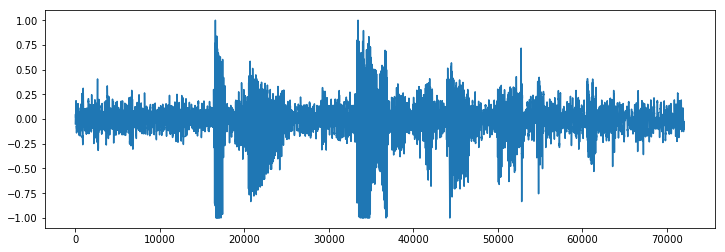

In [119]:
# original mix example
file = 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/isolated/tr05_bus_simu/01B_01BC020D_BUS.CH3.wav'

original, original_sr = sf.read(file)
original = af.normalise_audio(original)
plt.figure(figsize=(12,4))
x = range(len(original))
plt.plot(x,original)
ipd.Audio(original.T, rate=original_sr)

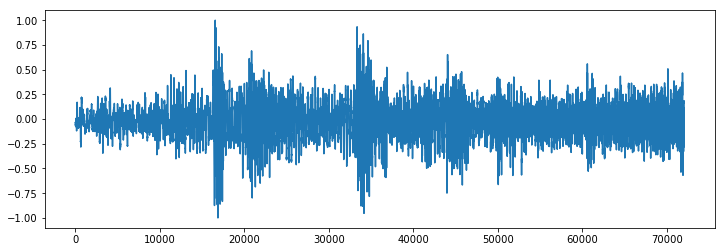

In [120]:
# new mix example
file = 'C:/Users/Toby/Speech_Data/BG_test/tr05_bus_simu/01B_01BC020D_BUS.CH3.wav'

new, new_sr = sf.read(file)
new = af.normalise_audio(new)
plt.figure(figsize=(12,4))
x = range(len(new))
plt.plot(x,new)
ipd.Audio(new.T, rate=new_sr)

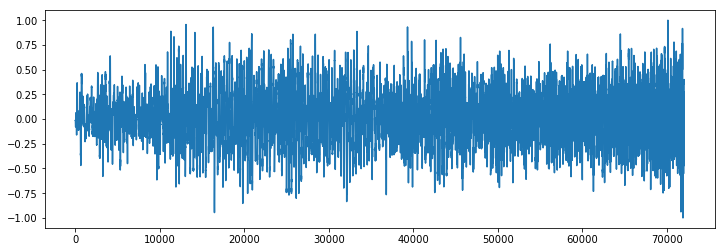

In [121]:
# new background
file = 'C:/Users/Toby/Speech_Data/BG_test/tr05_bus_bg/01B_01BC020D_BUS.CH3.wav'

bg, bg_sr = sf.read(file)
bg = af.normalise_audio(bg)
plt.figure(figsize=(12,4))
x = range(len(bg))
plt.plot(x,bg)
ipd.Audio(bg.T, rate=bg_sr)

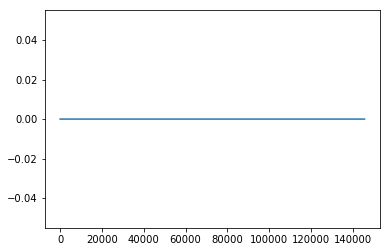

In [77]:
plt.plot(x,original-new)

In [63]:
new_mix_file_path

'C:/Users/Toby/Speech_Data/BG_test/tr05_bus_simu\\01B_01BC020D_BUS.CH6.wav'

In [60]:
background_file_list

['C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrounds\\BGD_150203_010_CAF.CH1.wav',
 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrounds\\BGD_150203_010_CAF.CH2.wav',
 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrounds\\BGD_150203_010_CAF.CH3.wav',
 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrounds\\BGD_150203_010_CAF.CH4.wav',
 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrounds\\BGD_150203_010_CAF.CH5.wav',
 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrounds\\BGD_150203_010_CAF.CH6.wav',
 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrounds\\BGD_150203_010_PED.CH1.wav',
 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrounds\\BGD_150203_010_PED.CH2.wav',
 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrounds\\BGD_150203_010_PED.CH3.wav',
 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrounds\\BGD_150203_010_PED.CH4.wav',
 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrou

In [47]:
# Get the distinct file WSJ files used in the original CHiME training set:
directory = 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/isolated/tr05_bus_simu'
file_list = os.listdir(directory)
file_list = set([f[:-11] for f in file_list])
file_list

{'404_404O0315_',
 '01J_01JO030C_',
 '027_027O0301_',
 '019_019C021G_',
 '01L_01LC020T_',
 '015_015C0208_',
 '20L_20LC010D_',
 '40G_40GO031C_',
 '02B_02BO030Z_',
 '403_403O030G_',
 '01M_01MC0204_',
 '01E_01EC021A_',
 '20L_20LO010P_',
 '018_018C020Z_',
 '20C_20CO010M_',
 '20P_20PC010C_',
 '01W_01WO0308_',
 '019_019C020U_',
 '40M_40MO030Y_',
 '40J_40JO030N_',
 '020_020C020G_',
 '406_406O030B_',
 '20G_20GO010L_',
 '01M_01MC021B_',
 '20T_20TO010I_',
 '40J_40JO0313_',
 '406_406C0210_',
 '01F_01FC0210_',
 '40H_40HO0301_',
 '20L_20LO010N_',
 '027_027O0314_',
 '40A_40AC020J_',
 '028_028O0304_',
 '011_011O0311_',
 '20L_20LO010C_',
 '40P_40PC020K_',
 '40J_40JC020I_',
 '028_028C0210_',
 '20N_20NO0105_',
 '40B_40BC0207_',
 '018_018C0216_',
 '40E_40EO0318_',
 '01U_01UO030C_',
 '02C_02CC0201_',
 '40L_40LC0207_',
 '40P_40PO030T_',
 '027_027C021A_',
 '020_020C020M_',
 '020_020C020H_',
 '01M_01MO0312_',
 '40L_40LC0211_',
 '020_020O030B_',
 '01E_01EC020O_',
 '01E_01EO0315_',
 '206_206O0108_',
 '01Y_01YO

In [5]:
root = '/home/enterprise.internal.city.ac.uk/acvn728/NewCHiME/'
string = 'bus'
path = {'x_train': 'tr05_' + string + '_simu/',
        'y_train_v': 'tr05_org',
        'y_train_b': 'tr05_' + string + '_bg/',
        'x_val': 'dt05_' + string + '_simu/',
        'y_val_v': 'dt05_bth',
        'y_val_b': 'dr05_' + string + '_bg/',
        'x_test': 'et05_' + string + '_simu/',
        'y_test_v': 'et05_bth',
        'y_test_b': 'er05_' + string + '_bg/'}

In [8]:
test_files = dataset.zip_files(os.path.join(root, path['x_test']),
                               os.path.join(root, path['y_test_v']),
                               os.path.join(root, path['y_test_b']))

In [9]:
test_files

array([], shape=(0, 3), dtype=float64)

In [13]:
directory_a = os.path.join(root, path['x_test'])

In [14]:
directory_b = os.path.join(root, path['y_test_v'])

In [15]:
directory_c = os.path.join(root, path['y_test_b'])

In [17]:
filelist_a = [f for f in os.listdir(directory_a) if
                  os.path.isfile(os.path.join(directory_a, f)) and re.search('CH0', f) is None]
filelist_a

['M05_443C020W_BUS.CH4.wav',
 'F06_445C0211_BUS.CH3.wav',
 'M06_445C020F_BUS.CH5.wav',
 'M05_441C020Y_BUS.CH4.wav',
 'M06_443C0213_BUS.CH4.wav',
 'M06_445C020F_BUS.CH1.wav',
 'F06_447C0213_BUS.CH6.wav',
 'F06_441C020U_BUS.CH3.wav',
 'M05_440C0207_BUS.CH1.wav',
 'M05_441C020B_BUS.CH6.wav',
 'F05_443C0202_BUS.CH3.wav',
 'F05_443C020J_BUS.CH6.wav',
 'M05_447C020A_BUS.CH3.wav',
 'F06_445C0203_BUS.CH5.wav',
 'F05_447C0211_BUS.CH5.wav',
 'M05_442C0206_BUS.CH6.wav',
 'M05_442C0204_BUS.CH4.wav',
 'F06_446C020J_BUS.CH1.wav',
 'F05_440C020T_BUS.CH3.wav',
 'M05_441C0211_BUS.CH3.wav',
 'M06_440C0201_BUS.CH6.wav',
 'M06_446C0207_BUS.CH1.wav',
 'F05_442C020P_BUS.CH4.wav',
 'F06_444C0213_BUS.CH3.wav',
 'F05_445C020J_BUS.CH6.wav',
 'F05_444C020Y_BUS.CH2.wav',
 'F06_447C0214_BUS.CH6.wav',
 'M05_442C0209_BUS.CH6.wav',
 'M06_442C0207_BUS.CH3.wav',
 'M06_444C0205_BUS.CH3.wav',
 'M05_440C0203_BUS.CH6.wav',
 'F05_445C020O_BUS.CH4.wav',
 'F05_445C0208_BUS.CH5.wav',
 'F05_444C020C_BUS.CH2.wav',
 'M06_447C020L

In [19]:
filelist_b = [f for f in os.listdir(directory_b) if
                  os.path.isfile(os.path.join(directory_b, f)) and re.search('CH0', f) is None]
filelist_b

['M05_443C020W_BTH.CH4.wav',
 'F06_445C0211_BTH.CH3.wav',
 'M06_445C020F_BTH.CH5.wav',
 'M05_441C020Y_BTH.CH4.wav',
 'M06_443C0213_BTH.CH4.wav',
 'M06_445C020F_BTH.CH1.wav',
 'F06_447C0213_BTH.CH6.wav',
 'F06_441C020U_BTH.CH3.wav',
 'M05_440C0207_BTH.CH1.wav',
 'M05_441C020B_BTH.CH6.wav',
 'F05_443C0202_BTH.CH3.wav',
 'F05_443C020J_BTH.CH6.wav',
 'M05_447C020A_BTH.CH3.wav',
 'F06_445C0203_BTH.CH5.wav',
 'F05_447C0211_BTH.CH5.wav',
 'M05_442C0206_BTH.CH6.wav',
 'M05_442C0204_BTH.CH4.wav',
 'F06_446C020J_BTH.CH1.wav',
 'F05_440C020T_BTH.CH3.wav',
 'M05_441C0211_BTH.CH3.wav',
 'M06_440C0201_BTH.CH6.wav',
 'M06_446C0207_BTH.CH1.wav',
 'F05_442C020P_BTH.CH4.wav',
 'F06_444C0213_BTH.CH3.wav',
 'F05_445C020J_BTH.CH6.wav',
 'F05_444C020Y_BTH.CH2.wav',
 'F06_447C0214_BTH.CH6.wav',
 'M05_442C0209_BTH.CH6.wav',
 'M06_442C0207_BTH.CH3.wav',
 'M06_444C0205_BTH.CH3.wav',
 'M05_440C0203_BTH.CH6.wav',
 'F05_445C020O_BTH.CH4.wav',
 'F05_445C0208_BTH.CH5.wav',
 'F05_444C020C_BTH.CH2.wav',
 'M06_447C020L